<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Image_preprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.transform
import skimage.io
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
skimage.__version__

In [ ]:
!rm -rf ./datasets/images/

!wget -q --directory-prefix='datasets/images/' https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/images/bird.jpeg
!wget -q --directory-prefix='datasets/images/' https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/images/book-mirrored.jpg
!wget -q --directory-prefix='datasets/images/' https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/images/giraffes.jpg
!wget -q --directory-prefix='datasets/images/' https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/images/monkeys.jpeg
!wget -q --directory-prefix='datasets/images/' https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/images/street.jpg

### Read the image

In [ ]:
bird = mpimg.imread("datasets/images/bird.jpeg")
type(bird)

In [ ]:
bird.shape

In [ ]:
plt.title("Original Image")
plt.imshow(bird) 
# since imshow() accepts a 3D tensor, you could try to generate some simple images

In [ ]:
plt.imshow(bird[100:250, 200:250])

### Cleaning Transformations

# Reshape

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
newarr = arr.reshape(4, 3)
newarr

In [ ]:
# you can pass -1 once to the reshape call and it will calculate the dimension
# ... where the -1 was passed for you
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
newarr = arr.reshape(2, -1, 2)
newarr

In [ ]:
# array flattening
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
newarr = arr.reshape(-1)
newarr

In [ ]:
bird.shape[0] # height

In [ ]:
# bird_reshaped = bird.reshape(1000,-1)
bird_reshaped = bird.reshape(bird.shape[0],-1)
bird_reshaped.shape

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_reshaped)

### Resize

In [ ]:
bird_resized = skimage.transform.resize(bird, (500, 500))
bird_resized.shape

In [ ]:
plt.figure(figsize = (6,6))
plt.title("Resized Image")
plt.imshow(bird_resized)

In [ ]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0]) # x / y
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

### Rescaling preserving aspect ratio

In [ ]:
# order=0, multichannel=True, anti_aliasing=False - were not needed previously, see: https://github.com/jni/scikit-image/commit/0b01e5951d7055225ec52469de0e090bd0dc9e39
bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original), order=0, multichannel=True, anti_aliasing=False)
bird_rescaled.shape

In [ ]:
plt.figure(figsize=(6,6)) 
plt.title("Rescaled Image")
plt.imshow(bird_rescaled) 

In [ ]:
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

### Reversing color from RGB to BGR
### Used in certain frameworks such as OpenCV and Caffe2, and certain image sets also contain the data in a different representation

In [ ]:
bird_BGR = bird[:, :, (2, 1, 0)] # BGR
# bird_BGR = bird[:, :, (0, 1, 2)] # the original ordering: RGB
plt.figure(figsize = (6, 6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [ ]:
bird_BGR.shape

### Graying

In [ ]:
bird_gray = skimage.color.rgb2gray(bird)

plt.figure(figsize = (6,6))
plt.title("Gray Image")

plt.imshow(bird_gray, cmap = 'gray')

In [ ]:
bird_gray.shape



In [ ]:
list(bird_gray)

### Cropping

In [ ]:
giraffes = skimage.img_as_float(skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure (figsize = (6, 6))
plt.title("Original Image")
plt.imshow(giraffes)

In [ ]:
giraffes.shape

In [ ]:
def crop(image, cropx, cropy):
    y, x, c = image.shape
    
    # start croping halfway at the x possition
    # ... and one third from the top
    startx = x//2 - (cropx // 8)
    starty = y//3 - (cropy // 4) 
    
    stopx = startx + cropx
    stopy = starty + 2*cropy
    
    return image[starty:stopy, startx:stopx]

In [ ]:
giraffes_cropped = crop(giraffes, 256, 256)

plt.figure(figsize = (6,6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)

### More generic cropping function

In [ ]:
def crop_enhanced(image, divide_x, divide_y, get_slice_x, get_slice_y):
    y, x, c = image.shape
    part_size_x = x // divide_x
    part_size_y = y // divide_y 
    start_x = get_slice_x * part_size_x
    start_y = get_slice_y * part_size_y
    stop_x = start_x + part_size_x
    stop_y = start_y + part_size_y
    return image[start_y:stop_y, start_x:stop_x]

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 2, 0, 0))

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 3, 0, 1))

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 3, 0, 2))

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 3, 1, 0))

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 3, 1, 1))

In [ ]:
plt.imshow(crop_enhanced(giraffes, 3, 3, 1, 2))

### Center cropping

# https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil

In [ ]:
# https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil

In [ ]:
import numpy as np

def center_crop(img, new_width=None, new_height=None):        

    width = img.shape[1]
    height = img.shape[0]

    if new_width is None:
        new_width = min(width, height)

    if new_height is None:
        new_height = min(width, height)

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))

    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img


plt.imshow(center_crop(bird, 100, 100))


In [ ]:
plt.imshow(center_crop(bird))

In [ ]:
pip install image 

### Denoising images

In [ ]:
from skimage.util import random_noise

In [ ]:
# Adding Gaussian noise: https://en.wikipedia.org/wiki/Gaussian_noise 
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var=sigma**2)

plt.figure (figsize = (6, 6))
plt.title("Image with added noise")
plt.imshow(noisy_giraffes)

In [ ]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

### Estimate the average noise standard deviation across color channels.

In [ ]:
sigma_est = estimate_sigma(noisy_giraffes, multichannel=True, average_sigmas=True)
sigma_est

# We can see that the result of the noise estimation is close to the noise level we added

In [ ]:
# estimate the noise in original pictures, see how much is there from the begining
sigma_est = estimate_sigma(giraffes, multichannel=True, average_sigmas=True)
sigma_est


More on denoising: https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html

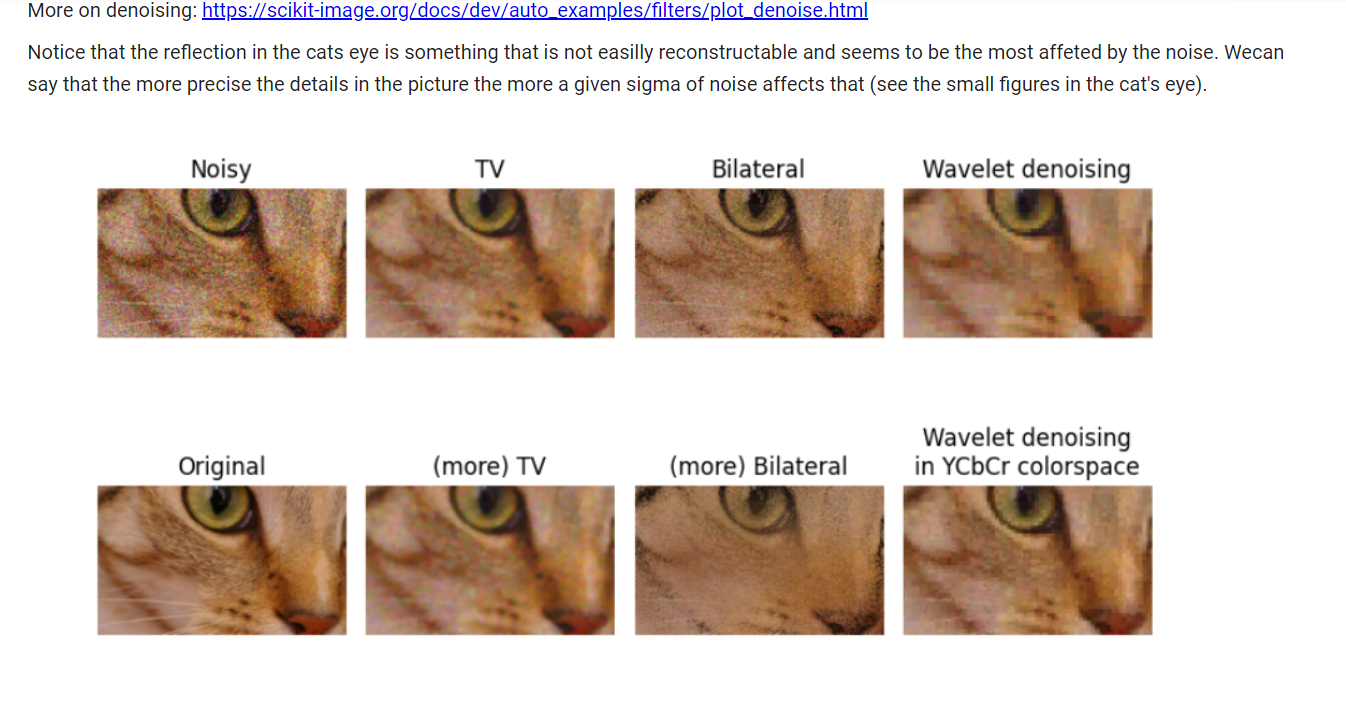

### CIFAR-10 dataset

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

In [ ]:
# what is pickle? Python pickle module is used for serializing and de-serializing a Python object structure. 
# ... Any object in Python can be pickled so that it can be saved on disk. 
# ... What pickle does is that it "serializes" the object first before writing it to file. 
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file: 
    X = pickle.load(input_file, encoding='latin1')

In [ ]:
X.keys()

In [ ]:
X

In [ ]:
X = X['data']

In [ ]:
X.shape

In [ ]:
# in this particular dataset the batch number is first, then the channel and the x, y sizes
X = X.reshape((-1, 3, 32, 32))
X.shape

In [ ]:
# X = X.transpose(0, 1, 2, 3)
X = X.transpose(0, 2, 3, 1)
X.shape

In [ ]:
# if you want to go back to the original format
X = X.reshape(-1, 3 * 32 * 32) 
X.shape

In [ ]:
# take a look at the images
plt.imshow(X[1].reshape(32, 32, 3))
plt.show()

### Normalization, mean imge

In [ ]:
# ... but first, let's see the mean image that we are going to subtract
# ... casting to unsigned int 8 is needed: https://stackoverflow.com/a/51255361/1964707
plt.imshow(X.mean(axis=0).reshape((32, 32, 3)).astype('uint8'))

In [ ]:
X = X - X.mean(axis=0)

In [ ]:
X = X / np.std(X, axis=0)

In [ ]:
plt.imshow(X[1].reshape((32, 32, 3)))

In [ ]:
def show_denorm(i):
    i = i.reshape((32, 32, 3))
    m, M = i.min(), i.max()
    print("m : " + str(m) + ", M :" + str(M))
    # normalization: (x - mean / std) => (xd * std + mean)
    # ... and this is a different technique
    plt.imshow((i - m) / (M - m))
    plt.show()

# X[1].shape
show_denorm(X[1])

### ZCA whitening
# Whitening is a transformation of data in such a way that its covariance matrix Σ is the identity matrix. Hence whitening decorrelates features. It is used as a preprocessing method. Principal component analysis (PCA) and Zero-phase component analysis (ZCA) are the two ways to do this.

 - compute the covariance of the image data
 - perform singular value decomposition (These steps take time) on the covariance matrix
 - build the ZCA matrix from the SVD values
 - transform the image data by calclating the dot product of the ZCA matrix and the images
# Models become more robust (more predictive) with this transformation applied.

### More on this:

https://www.youtube.com/watch?v=JhtE8VEQOhc

https://cbrnr.github.io/posts/whitening-pca-zca/

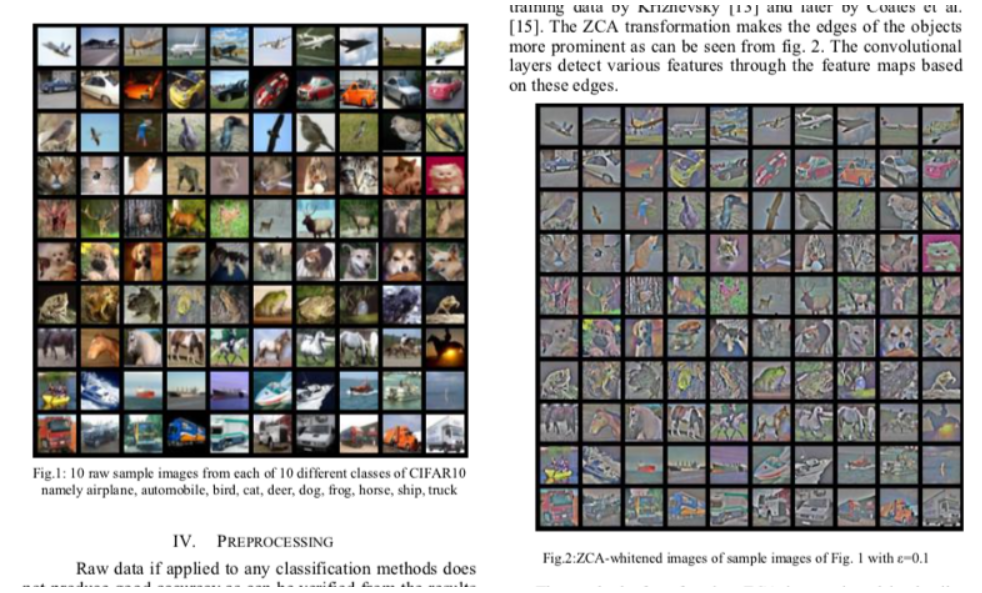

In [ ]:
X_subset = X[:1000]
X_subset.shape

In [ ]:
# calculating the covariance matrix
# ... the covariance between two relationships can be understood as the 
# ... correlation of those variables. If when one is bigger the other is bigger and vv
# ... those two variables are said to have possitive covariance
cov = np.cov(X_subset, rowvar=True)  

In [ ]:
cov.shape

### Decompose matrix using Singular Value
### Decomposition which performs factor analysis

In [ ]:
U, S, V = np.linalg.svd(cov)

In [ ]:
print(U.shape)
print(S.shape)
print(V.shape)

The result of the decomposition will give us the leading factors of our image. The ZCA matrix will contain the principle components of the image.

In [ ]:
epsilon = 1e-5
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [ ]:
zca_matrix.shape

Multiply the principal components by the original matrix is whitening

In [ ]:
zca = np.dot(zca_matrix, X_subset)   

In [ ]:
zca = np.dot(zca_matrix, X_subset)   

In [ ]:
show_denorm(zca[1])

### PyTorch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
dir(transforms)

In [ ]:
tr = transforms.Compose([transforms.Resize(256),transforms.ToTensor()])

In [ ]:
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform=tr)

In [ ]:
dataset

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

### Viewing the images

In [ ]:
images_batch, labels_batch = iter(dataloader).next()

In [ ]:
images_batch.shape

In [ ]:
labels_batch.shape

In [ ]:
labels_batch

In [ ]:
img = torchvision.utils.make_grid(images_batch)

In [ ]:
img.shape

In [ ]:
img = np.transpose(img, (1, 2, 0))

In [ ]:
img.shape

In [ ]:
plt.figure(figsize = (16, 12))

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import matplotlib
img = torchvision.utils.make_grid(images_batch)
img = np.transpose(img, (1, 2, 0))
img = (img - img.min()) / (img.max() - img.min())
plt.figure(figsize = (16, 12))
plt.imshow(img)
plt.show()

In [ ]:
pop_mean = []
pop_std = []

In [ ]:
for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
    numpy_image = data[0].numpy()
    # shape (3,)
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [ ]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [ ]:
pop_mean.shape, pop_std.shape

In [ ]:
# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)

pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)

In [ ]:
print(pop_mean)
print(pop_std)

In [ ]:
transform = transforms.Compose([
              transforms.Resize(256),
              transforms.RandomResizedCrop(224),
              transforms.ColorJitter(),
              transforms.RandomHorizontalFlip(),
              transforms.ToTensor(),
              transforms.Normalize(pop_mean, pop_std)
            ])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', train=True, download=True, transform=transform)

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

In [ ]:
images_batch, labels_batch = iter(trainloader).next()

In [ ]:
images_batch.shape